In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, accuracy_score

We will start with kernel methods for the synthetic dataset because one of the major bottle necks with kernel methods in machine learning is although they have trainability gurantees, they are time consuming as similarity or distance between each point has to be calculated and that is how the higher feature space is actually accessed

In [ ]:
# Generate an imbalanced synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

In [ ]:
from google.colab import files
uploaded = files.upload()

Using all the metrics that was used in the youtube lecture (confuson matrix, accuracy report)


 Kernel: linear
Accuracy: 0.8530
Confusion Matrix:
[[765 130]
 [ 17  88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       895
           1       0.40      0.84      0.54       105

    accuracy                           0.85      1000
   macro avg       0.69      0.85      0.73      1000
weighted avg       0.92      0.85      0.87      1000


 Kernel: rbf
Accuracy: 0.8850
Confusion Matrix:
[[803  92]
 [ 23  82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       895
           1       0.47      0.78      0.59       105

    accuracy                           0.89      1000
   macro avg       0.72      0.84      0.76      1000
weighted avg       0.92      0.89      0.90      1000


 Kernel: poly
Accuracy: 0.8890
Confusion Matrix:
[[817  78]
 [ 33  72]]
Classification Report:
              precision    recall  f1-score   support

  

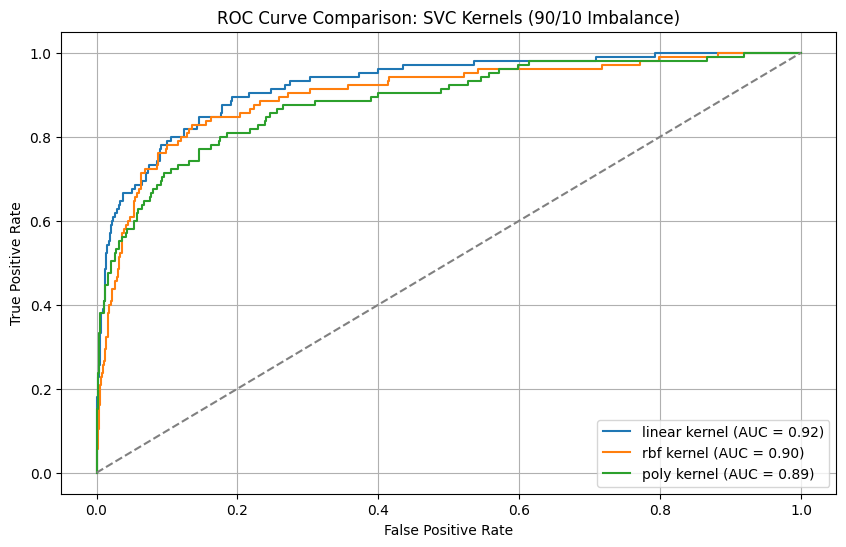

In [ ]:
# 1. Generate more imbalanced synthetic dataset (90% class 0, 10% class 1)
## 1. Generate imbalanced synthetic dataset as in the previous example
X, y = make_classification(
    n_samples=5000,
    n_classes=2,
    weights=[0.9, 0.1],
    random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Train SVC models with different kernels
kernels = ['linear', 'rbf', 'poly']
models = {}
metrics = {}

for kernel in kernels:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(kernel=kernel, class_weight='balanced', probability=True, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    models[kernel] = pipeline

    # Predict labels & probabilities
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    # Store metrics
    metrics[kernel] = {
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'accuracy': accuracy_score(y_test, y_pred),
        'auc': roc_auc_score(y_test, y_proba),
        'fpr_tpr': roc_curve(y_test, y_proba)
    }

# 4. Print Metrics
for kernel in kernels:
    print(f"\n Kernel: {kernel}")
    print(f"Accuracy: {metrics[kernel]['accuracy']:.4f}")
    print("Confusion Matrix:")
    print(metrics[kernel]['confusion_matrix'])
    print("Classification Report:")
    print(classification_report(y_test, models[kernel].predict(X_test)))

# 5. Plot ROC curves
plt.figure(figsize=(10, 6))
for kernel in kernels:
    fpr, tpr, _ = metrics[kernel]['fpr_tpr']
    auc_score = metrics[kernel]['auc']
    plt.plot(fpr, tpr, label=f"{kernel} kernel (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison: SVC Kernels (90/10 Imbalance)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


 Kernel: linear
Accuracy: 0.8630
Confusion Matrix:
[[821 124]
 [ 13  42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       945
           1       0.25      0.76      0.38        55

    accuracy                           0.86      1000
   macro avg       0.62      0.82      0.65      1000
weighted avg       0.94      0.86      0.89      1000


 Kernel: rbf
Accuracy: 0.9070
Confusion Matrix:
[[873  72]
 [ 21  34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       945
           1       0.32      0.62      0.42        55

    accuracy                           0.91      1000
   macro avg       0.65      0.77      0.69      1000
weighted avg       0.94      0.91      0.92      1000


 Kernel: poly
Accuracy: 0.9200
Confusion Matrix:
[[891  54]
 [ 26  29]]
Classification Report:
              precision    recall  f1-score   support

  

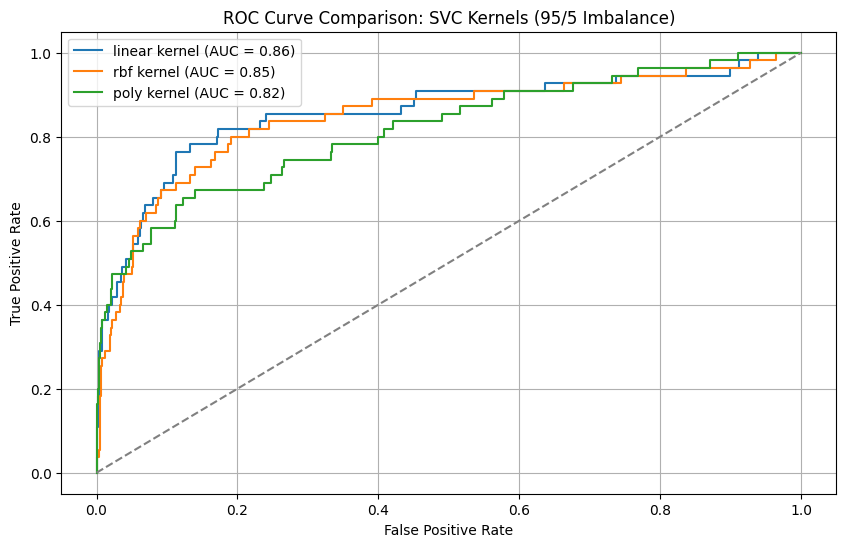

In [ ]:

# 1. Generate more imbalanced synthetic dataset (95% class 0, 5% class 1)
## 1. Generate imbalanced synthetic dataset as in the previous example, but with more imbalance in this one
X, y = make_classification(
    n_samples=5000,
    n_classes=2,
    weights=[0.95, 0.05],
    random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Train SVC models with different kernels
kernels = ['linear', 'rbf', 'poly']
models = {}
metrics = {}

for kernel in kernels:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(kernel=kernel, class_weight='balanced', probability=True, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    models[kernel] = pipeline

    # Predict labels & probabilities
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    # Store metrics
    metrics[kernel] = {
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'accuracy': accuracy_score(y_test, y_pred),
        'auc': roc_auc_score(y_test, y_proba),
        'fpr_tpr': roc_curve(y_test, y_proba)
    }

# 4. Print Metrics
for kernel in kernels:
    print(f"\n Kernel: {kernel}")
    print(f"Accuracy: {metrics[kernel]['accuracy']:.4f}")
    print("Confusion Matrix:")
    print(metrics[kernel]['confusion_matrix'])
    print("Classification Report:")
    print(classification_report(y_test, models[kernel].predict(X_test)))

# 5. Plot ROC curves
plt.figure(figsize=(10, 6))
for kernel in kernels:
    fpr, tpr, _ = metrics[kernel]['fpr_tpr']
    auc_score = metrics[kernel]['auc']
    plt.plot(fpr, tpr, label=f"{kernel} kernel (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison: SVC Kernels (95/5 Imbalance)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()



 Kernel: linear
Accuracy: 0.8370
Confusion Matrix:
[[817 158]
 [  5  20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       975
           1       0.11      0.80      0.20        25

    accuracy                           0.84      1000
   macro avg       0.55      0.82      0.55      1000
weighted avg       0.97      0.84      0.89      1000


 Kernel: rbf
Accuracy: 0.9550
Confusion Matrix:
[[943  32]
 [ 13  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       975
           1       0.27      0.48      0.35        25

    accuracy                           0.95      1000
   macro avg       0.63      0.72      0.66      1000
weighted avg       0.97      0.95      0.96      1000


 Kernel: poly
Accuracy: 0.9420
Confusion Matrix:
[[930  45]
 [ 13  12]]
Classification Report:
              precision    recall  f1-score   support

  

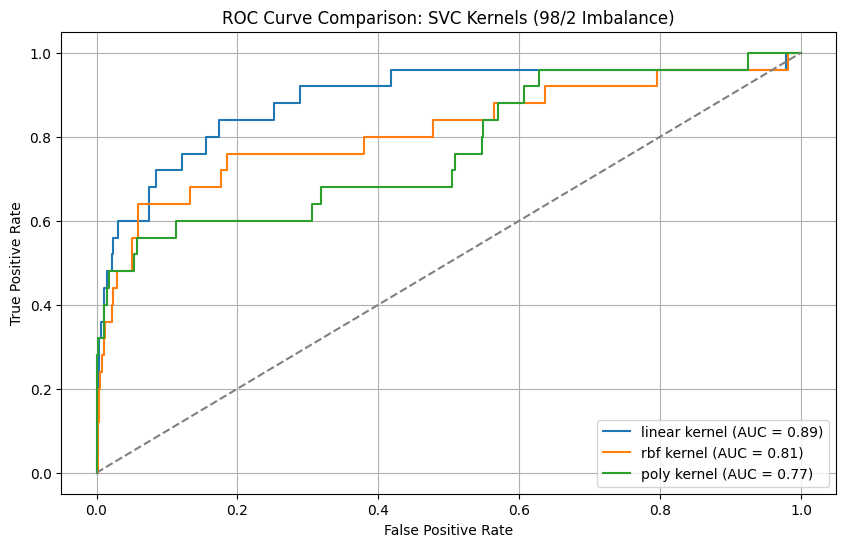

In [ ]:
# 1. Generate more imbalanced synthetic dataset (98% class 0, 2% class 1)
## 1. Generate imbalanced synthetic dataset as in the previous example, highest imbalance, also more samples
X, y = make_classification(
    n_samples=5000,
    n_classes=2,
    weights=[0.98, 0.02],
    random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Train SVC models with different kernels
kernels = ['linear', 'rbf', 'poly']
models = {}
metrics = {}

for kernel in kernels:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(kernel=kernel, class_weight='balanced', probability=True, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    models[kernel] = pipeline

    # Predict labels & probabilities
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    # Store metrics
    metrics[kernel] = {
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'accuracy': accuracy_score(y_test, y_pred),
        'auc': roc_auc_score(y_test, y_proba),
        'fpr_tpr': roc_curve(y_test, y_proba)
    }

# 4. Print Metrics
for kernel in kernels:
    print(f"\n Kernel: {kernel}")
    print(f"Accuracy: {metrics[kernel]['accuracy']:.4f}")
    print("Confusion Matrix:")
    print(metrics[kernel]['confusion_matrix'])
    print("Classification Report:")
    print(classification_report(y_test, models[kernel].predict(X_test)))

# 5. Plot ROC curves
plt.figure(figsize=(10, 6))
for kernel in kernels:
    fpr, tpr, _ = metrics[kernel]['fpr_tpr']
    auc_score = metrics[kernel]['auc']
    plt.plot(fpr, tpr, label=f"{kernel} kernel (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison: SVC Kernels (98/2 Imbalance)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()